In [84]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

# 1-D Example Data

## Create Model

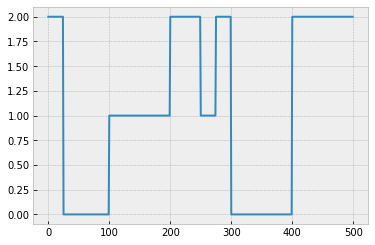

In [2]:
# create vectors
phys_space = np.array([np.arange(500)]).T
feat_space = np.random.randn(500,3)

# np.random.seed(12345)

# define domain
latent_1D = np.zeros_like(phys_space[:,0])
dist = scipy.stats.bernoulli(0.01)
dist2 = scipy.stats.bernoulli(0.45)

# create latent field

# val = 0
# for i in range(len(phys_space[:,0])):
#     if dist.rvs():
#         if  dist2.rvs():
#             val = 2 - val
#         else:
#             val = 1 - val
#     latent_1D[i] = val

latent_1D = np.ones(25)*2
latent_1D = np.append(latent_1D, np.ones(75)*0)
latent_1D = np.append(latent_1D, np.ones(100)*1)
latent_1D = np.append(latent_1D, np.ones(50)*2)
latent_1D = np.append(latent_1D, np.ones(25)*1)
latent_1D = np.append(latent_1D, np.ones(25)*2)
latent_1D = np.append(latent_1D, np.ones(100)*0)
latent_1D = np.append(latent_1D, np.ones(100)*2)

plt.plot(latent_1D);

In [793]:
ex1.diagnostics_plot?

In [22]:
np.random.choice

<function RandomState.choice>

In [41]:
n_labels = 3
l = np.array([np.arange(n_labels),np.arange(n_labels),np.arange(n_labels)])
print(l)

[[0 1 2]
 [0 1 2]
 [0 1 2]]


In [63]:
prob = np.array([[0.2,0.4,0.4],[0.2,0.4,0.4],[0.2,0.4,0.4]])

In [66]:
prob[0,:]

array([ 0.2,  0.4,  0.4])

In [79]:
j

array([0, 1, 2])

In [78]:
j = np.arange(3)

In [80]:
prob[j,:]

array([[ 0.2,  0.4,  0.4],
       [ 0.2,  0.4,  0.4],
       [ 0.2,  0.4,  0.4]])

In [83]:
np.random.choice(3, p=prob[0, :], size=(500))

array([2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1,
       1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1,
       2, 2,

In [51]:
np.random.randint?

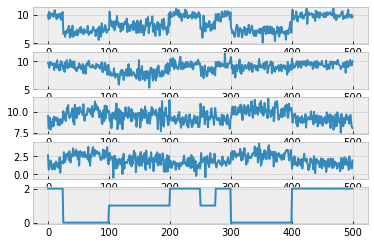

In [3]:
i = 4
c1 = scipy.stats.multivariate_normal([7,9,10,2.7], np.eye(i)*0.35)
c2 = scipy.stats.multivariate_normal([8,8,9.5,2], np.eye(i)*0.55)
c3 = scipy.stats.multivariate_normal([10,9.5,9,1.5], np.eye(i)*0.25)
#c4 = scipy.stats.multivariate_normal([8,10,9,4], np.eye(i)*0.25)

obs = np.empty((len(phys_space[:,0]), 4))

for i,l in enumerate(latent_1D):
    # generate a 2-d random vector at each point
    if l == 0:
        obs[i,:] = c1.rvs()
    elif l == 1:
        obs[i,:] = c2.rvs()
    elif l == 2:
        obs[i,:] = c3.rvs()
        
fig, ax = plt.subplots(5,1)
ax[0].plot(obs[:,0])
ax[1].plot(obs[:,1])
ax[2].plot(obs[:,2])
ax[3].plot(obs[:,3])
ax[4].plot(latent_1D)

# Model

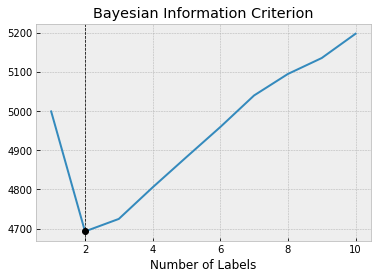

global minimum:  2


In [4]:
bayseg.bic(obs, 10)

In [308]:
obs

array([[  9.99425162,   9.72973734,   9.48918237,   2.64480256],
       [  9.24233438,   9.45195977,   8.00986004,   0.64355599],
       [ 10.50531959,   8.87106529,   8.33848631,   0.75819713],
       ..., 
       [  9.47316797,   9.89748173,   8.74269926,   1.45913267],
       [  9.95510219,   9.2869184 ,   8.17254   ,   0.8138839 ],
       [  9.61974152,  10.06093961,   8.06196488,   1.91678166]])

In [9]:
ex1 = bayseg.BaySeg(phys_space, obs, 4, beta_init=10)

In [13]:
ex1.fit(450, beta_jump_length=5, verbose=False)

100%|█████████████████████████████████████████████████████████████████████████████| 450/450 [01:23<00:00,  5.40it/s]


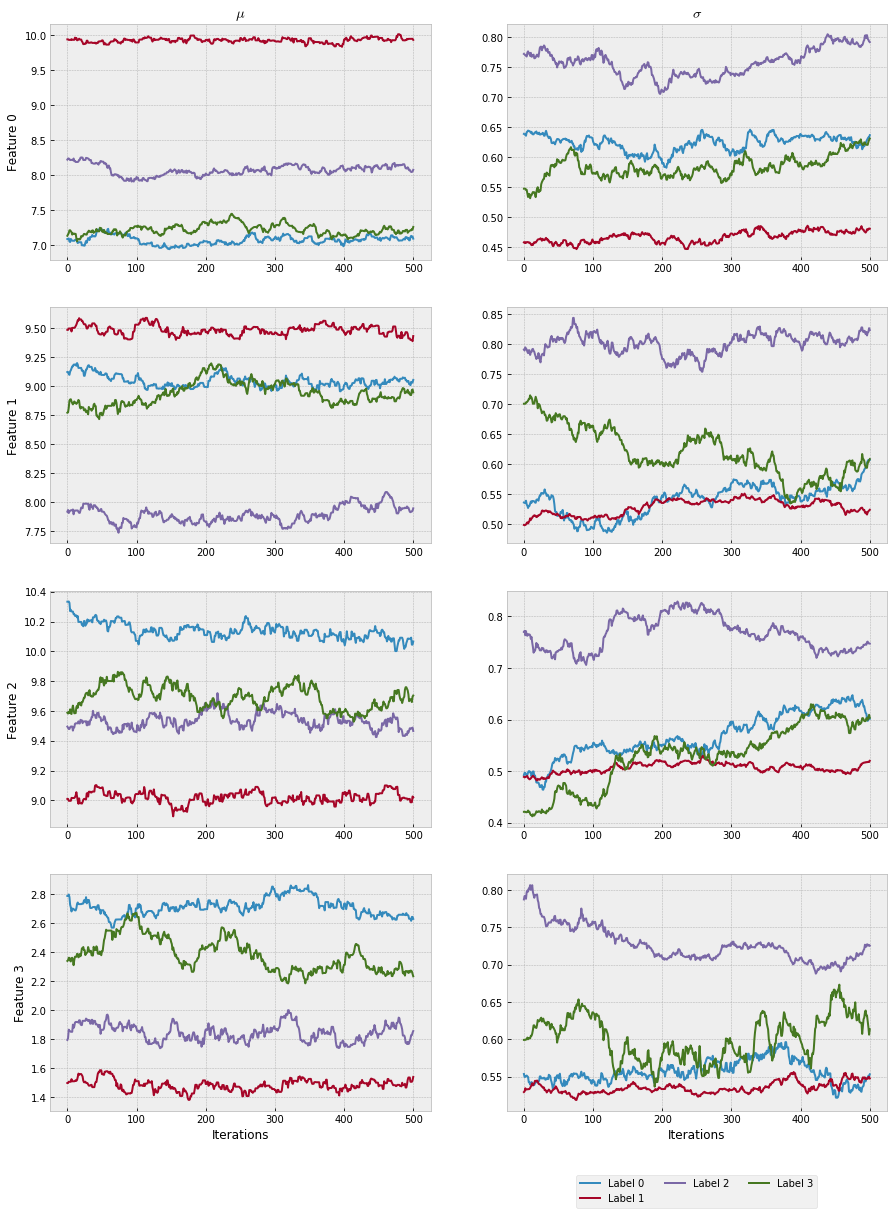

In [14]:
ex1.plot_mu_stdev()
# plt.tight_layout()
# plt.savefig("mu_stdev.png")

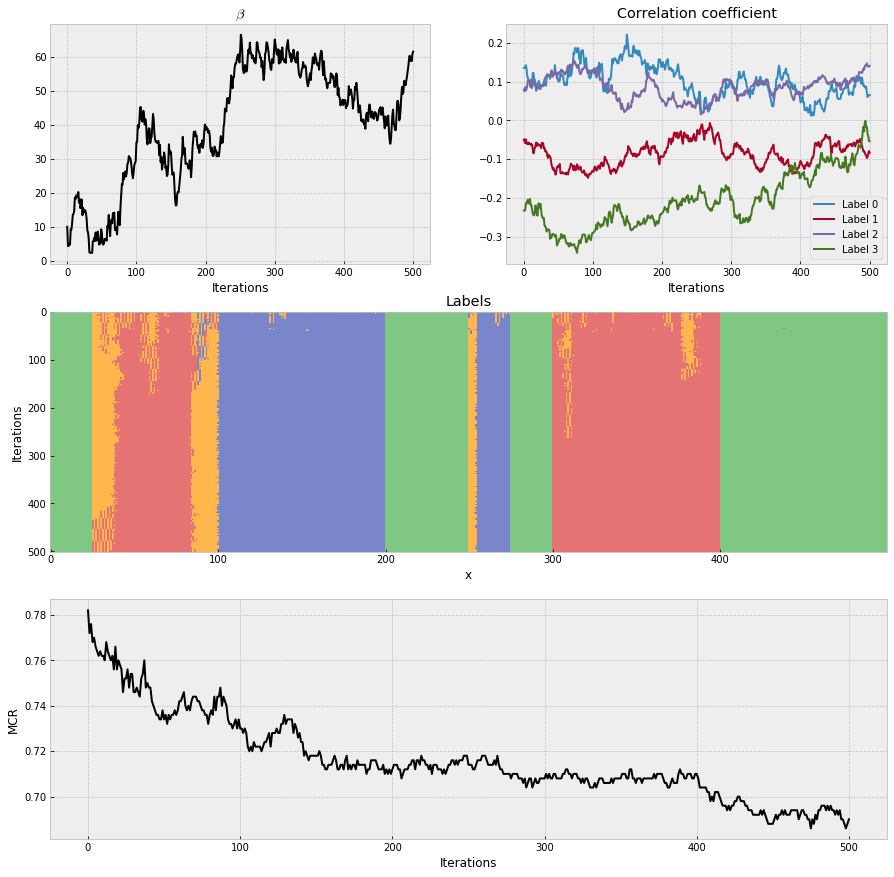

In [15]:
ex1.diagnostics_plot(true_labels=latent_1D)
#plt.tight_layout()
#plt.savefig("diagn.png")

# VECTORIZE

In [85]:
import numpy as np
from sklearn import mixture
from scipy.stats import multivariate_normal, norm
from copy import copy
from itertools import combinations
import tqdm  # progress bar
import matplotlib.pyplot as plt
from matplotlib import gridspec  # plot arrangements

In [508]:
def calc_energy_like(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """

    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    print("energy like shp:", np.shape(energy_like_labels))

    for x in range(len(self.coords)):
        for l in range(self.n_labels):
            energy_like_labels[x, l] = 0.5 * np.array([self.obs[x] - mu[l, :]]) @ np.linalg.inv(cov[l, :, :]) @ np.array([self.obs[x] - mu[l, :]]).T + 0.5 * np.log(np.linalg.det(cov[l, :, :]))

    # TODO: 2-dimensional calculation of energy likelihood labels
    # TODO: 3-dimensional calculation of energy likelihood labels

    return energy_like_labels

In [559]:
def calc_energy_like_vect(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """

    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    #print("energy like shp:", np.shape(energy_like_labels))

    for l in range(self.n_labels):
        energy_like_labels[:,l] = np.einsum("...i,ji,...j", 0.5 * np.array([self.obs - mu[l, :]]), np.linalg.inv(cov[l, :, :]), np.array([self.obs - mu[l, :]])) + 0.5 * np.log(np.linalg.det(cov[l, :, :]))
        
    # TODO: 2-dimensional calculation of energy likelihood labels
    # TODO: 3-dimensional calculation of energy likelihood labels

    return energy_like_labels

In [581]:
r = np.random.rand(100)

In [592]:
d = (p.T-np.random.rand(100)).T

In [603]:
np.argmin(np.abs(d), axis=1)

array([0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [606]:
np.shape(p)

(100, 3)

In [680]:
p = np.cumsum(a, axis=1)

In [681]:
s = np.sum(p[:,1:], axis=1)

In [686]:
np.random.rand?

In [684]:
p[0,:] / p[0,-1]

array([ 0.        ,  0.46787303,  0.53212697,  1.        ])

In [687]:
np.disp?

In [ ]:
np

In [702]:
p = np.array([  1.00309378e-09 ,  9.97839645e-01 ,  9.97839645e-01  , 1.00000000e+00])

In [704]:
r = np.random.rand()

In [705]:
r

0.9066335394659929

In [714]:
np.greater(0, r - p)

array([False,  True,  True,  True], dtype=bool)

In [722]:
np.random.choice??

<Container object of 4 artists>

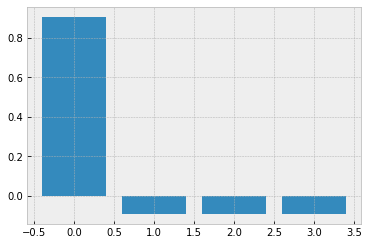

In [719]:
plt.bar([0,1,2,3],r-p)

In [715]:
np.count_nonzero(np.greater(0, r-p))

3

In [682]:
s[0]

1.9464732671502507

In [677]:
np.sum(p[:,1:], axis=1)

array([ 1.94647327,  4.82591513,  4.71037175,  2.70751363,  3.22853975,
        3.61372168,  2.18053045,  3.78933844,  3.19119747,  2.86452019,
        2.68941251,  4.52845263,  3.91740133,  2.68222934,  5.31836311,
        3.05754204,  2.18094922,  2.32105015,  4.84972977,  1.69055941,
        3.23115543,  1.93332866,  3.64336651,  3.19679941,  3.273858  ,
        4.28697164,  3.85254782,  3.53641741,  2.59280149,  1.60458141,
        2.40656464,  3.43328734,  5.05218773,  4.15501295,  5.32951214,
        4.8854624 ,  5.14397811,  3.2080425 ,  3.07450971,  2.64562047,
        3.19657623,  2.26246165,  2.34360343,  2.58697666,  1.09520276,
        1.42850679,  5.36880844,  4.37622035,  2.56662793,  2.42548986,
        1.92942418,  3.70139406,  5.18909303,  3.75710748,  3.94333625,
        3.52311776,  0.8907445 ,  2.56156148,  3.69559096,  2.47564689,
        0.34876715,  1.63552601,  3.7472668 ,  0.91749021,  0.37715301,
        4.61064237,  3.27406184,  0.75829644,  0.73058554,  3.92

In [792]:
# create labels probability
labels_prob = np.array([[0.2,0.3,0.5],[0.2,0.3,0.5],[0.2,0.3,0.5]])
print("labels prob")
print(labels_prob)

labels_prob_cs = labels_prob.cumsum(axis=1)
# labels_prob_cs = np.concatenate((np.expand_dims(np.zeros(len(labels_prob_cs)), axis=1), labels_prob_cs), axis=1)
print("\n")
print("labels prob cumsum")
print(labels_prob_cs)

# draw random samples
r = np.random.rand(len(labels_prob))
print("\n")
print("random samples")
print(r)

# difference
d = (labels_prob_cs.T - r).T
print("\n")
print("difference: cumsum probs - samples")
print(d)

np.greater_equal(0, d)

labels prob
[[ 0.2  0.3  0.5]
 [ 0.2  0.3  0.5]
 [ 0.2  0.3  0.5]]


labels prob cumsum
[[ 0.2  0.5  1. ]
 [ 0.2  0.5  1. ]
 [ 0.2  0.5  1. ]]


random samples
[ 0.0150777   0.51195717  0.65433746]


difference: cumsum probs - samples
[[ 0.1849223   0.4849223   0.9849223 ]
 [-0.31195717 -0.01195717  0.48804283]
 [-0.45433746 -0.15433746  0.34566254]]


array([[False, False, False],
       [ True,  True, False],
       [ True,  True, False]], dtype=bool)

In [675]:
norm_p = (p.T / s).T

In [725]:
np.count_nonzero(np.less(0,norm_p), axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [664]:
np.argmin(np.abs((norm_p.T - r)).T, axis=1)

array([3, 3, 3, 2, 3, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3,
       3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 0, 2, 3, 1, 0, 3, 3, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 2,
       1, 3, 1, 3, 3, 3, 2, 3], dtype=int64)

In [729]:
np.random??

In [635]:
b = a[:,:-1] + a[:,1:]

In [636]:
b

array([[ 0.45535117,  0.51788546,  0.51788546],
       [ 0.9214922 ,  1.49146536,  1.49146536],
       [ 0.76060501,  1.59458087,  1.59458087],
       [ 0.3284224 ,  1.02533441,  1.02533441],
       [ 0.74862602,  0.86564385,  0.86564385],
       [ 0.41287006,  1.39399078,  1.39399078],
       [ 0.15223437,  0.93803085,  0.93803085],
       [ 0.62624364,  1.26842558,  1.26842558],
       [ 0.32886995,  1.26672878,  1.26672878],
       [ 0.217996  ,  1.21426409,  1.21426409],
       [ 0.30708318,  1.03762308,  1.03762308],
       [ 0.77662534,  1.48760097,  1.48760097],
       [ 0.73005863,  1.22864204,  1.22864204],
       [ 0.2922055 ,  1.04890917,  1.04890917],
       [ 0.87873207,  1.78044948,  1.78044948],
       [ 0.38040458,  1.14836643,  1.14836643],
       [ 0.32085543,  0.76961918,  0.76961918],
       [ 0.18730552,  0.97321955,  0.97321955],
       [ 0.75799307,  1.66687181,  1.66687181],
       [ 0.24255875,  0.60272096,  0.60272096],
       [ 0.41986909,  1.19570862,  1.195

In [626]:
a = np.concatenate((p, np.expand_dims(r, axis=1)), axis=1)

array([[ 0.45535117],
       [ 0.9214922 ],
       [ 0.76060501],
       [ 0.3284224 ],
       [ 0.74862602],
       [ 0.41287006],
       [ 0.15223437],
       [ 0.62624364],
       [ 0.32886995],
       [ 0.217996  ],
       [ 0.30708318],
       [ 0.77662534],
       [ 0.73005863],
       [ 0.2922055 ],
       [ 0.87873207],
       [ 0.38040458],
       [ 0.32085543],
       [ 0.18730552],
       [ 0.75799307],
       [ 0.24255875],
       [ 0.41986909],
       [ 0.33780971],
       [ 0.50936274],
       [ 0.70747578],
       [ 0.60779229],
       [ 0.9946138 ],
       [ 0.76500631],
       [ 0.39147552],
       [ 0.64335214],
       [ 0.19623195],
       [ 0.29639347],
       [ 0.53732672],
       [ 0.8270466 ],
       [ 0.95348109],
       [ 0.8978831 ],
       [ 0.80145117],
       [ 0.91606247],
       [ 0.71872857],
       [ 0.73697722],
       [ 0.44867586],
       [ 0.47823307],
       [ 0.46297157],
       [ 0.53490918],
       [ 0.50571176],
       [ 0.02666936],
       [ 0

In [619]:
np.stack((p,np.shape()))

ValueError: all input arrays must have the same shape

In [600]:
p = np.stack((np.zeros(100), r, np.random.rand(100)), axis=1)
p

array([[ 0.        ,  0.45535117,  0.06253429],
       [ 0.        ,  0.9214922 ,  0.56997316],
       [ 0.        ,  0.76060501,  0.83397586],
       [ 0.        ,  0.3284224 ,  0.69691201],
       [ 0.        ,  0.74862602,  0.11701783],
       [ 0.        ,  0.41287006,  0.98112071],
       [ 0.        ,  0.15223437,  0.78579648],
       [ 0.        ,  0.62624364,  0.64218193],
       [ 0.        ,  0.32886995,  0.93785883],
       [ 0.        ,  0.217996  ,  0.99626809],
       [ 0.        ,  0.30708318,  0.7305399 ],
       [ 0.        ,  0.77662534,  0.71097563],
       [ 0.        ,  0.73005863,  0.49858341],
       [ 0.        ,  0.2922055 ,  0.75670367],
       [ 0.        ,  0.87873207,  0.90171741],
       [ 0.        ,  0.38040458,  0.76796185],
       [ 0.        ,  0.32085543,  0.44876376],
       [ 0.        ,  0.18730552,  0.78591403],
       [ 0.        ,  0.75799307,  0.90887874],
       [ 0.        ,  0.24255875,  0.36016221],
       [ 0.        ,  0.41986909,  0.775

In [560]:
calc_energy_like(ex1, ex1.mus[-1], ex1.covs[-1])

energy like shp: (500, 4)


array([[ 11.46015781,   0.14903652,   4.46443899,   8.97220106],
       [ 15.1909697 ,   1.61638822,   3.92358748,  17.71240953],
       [ 23.60902072,   0.62260838,   5.91786295,  26.65677807],
       ..., 
       [ 10.53858969,  -1.74139897,   3.07176339,   9.57917324],
       [ 18.929389  ,  -0.30614229,   4.63876347,  20.98130566],
       [ 15.92238363,   0.18936604,   4.88069498,  13.10072542]])

In [561]:
calc_energy_like_vect(ex1, ex1.mus[-1], ex1.covs[-1])

array([[ 11.46015781,   0.14903652,   4.46443899,   8.97220106],
       [ 15.1909697 ,   1.61638822,   3.92358748,  17.71240953],
       [ 23.60902072,   0.62260838,   5.91786295,  26.65677807],
       ..., 
       [ 10.53858969,  -1.74139897,   3.07176339,   9.57917324],
       [ 18.929389  ,  -0.30614229,   4.63876347,  20.98130566],
       [ 15.92238363,   0.18936604,   4.88069498,  13.10072542]])

In [257]:
l = 0

In [317]:
k_m = ex1.obs - ex1.mus[-1][l, :]
np.shape(k_m)

(500, 4)

In [334]:
biggy = np.tile(np.expand_dims(np.linalg.inv(ex1.covs[-1][l, :, :]), axis=2), 500)

In [335]:
np.shape(biggy)

(4, 4, 500)

In [342]:
np.shape(k_m @ biggy @ n_k)

(4, 500, 4)

In [377]:
np.shape(np.linalg.inv(ex1.covs[-1][l, :, :]))

(4, 4)

In [378]:
np.shape(k_m)

(500, 4)

In [386]:
np.shape(n_k)

(500, 4)

In [411]:
a[0]*covy[0,0]+a[1]*covy[0,1]+a[2]*covy[0,2]+a[3]*covy[0,3]

0.15665049215631499

In [399]:
a = 0.5 * ex1.obs[0] - ex1.mus[-1][l, :]
a

array([-2.09585201, -4.18724516, -5.32153163, -1.30571602])

In [401]:
covy = np.linalg.inv(ex1.covs[-1][l, :, :])
covy

array([[ 2.81488126, -0.42904407, -0.98331467,  0.74520629],
       [-0.42904407,  2.92169317,  0.75536597, -0.58138011],
       [-0.98331467,  0.75536597,  3.4035855 , -1.11943971],
       [ 0.74520629, -0.58138011, -1.11943971,  3.73813331]])

In [414]:
np.einsum?

In [417]:
A = np.arange(25).reshape(5,5)

In [418]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [419]:
np.einsum('ij,ij->ij', A, A)

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

In [421]:
np.einsum('i...,i...', A, A)

array([ 750,  855,  970, 1095, 1230])

In [424]:
c = np.arange(6).reshape(2,3)
c

array([[0, 1, 2],
       [3, 4, 5]])

In [431]:
np.einsum('i...->...', A)

array([50, 55, 60, 65, 70])

In [454]:
storage = []
for x in range(500):
    storage.append(np.einsum("i,ji,j",
              ex1.obs[x] - ex1.mus[-1][l, :],
              np.linalg.inv(ex1.covs[-1][l, :, :]), 
              ex1.obs[x] - ex1.mus[-1][l, :]))

In [447]:
storage

[27.264302123034213,
 34.725925892756749,
 51.562027929069345,
 19.763781568869927,
 42.18733969893519,
 30.691825905047047,
 37.883075038915948,
 46.529475248264824,
 32.071042561144104,
 34.740831233606592,
 33.816402002935462,
 48.71361347886625,
 29.165794383061947,
 32.257855817358468,
 19.172849051341252,
 29.276301281077608,
 28.26843577646228,
 34.374765836003924,
 32.950314213219357,
 40.984962444741598,
 44.517444394201455,
 18.474905033425191,
 32.141262735667603,
 38.875748830330011,
 41.369013527509047,
 5.7585284238793824,
 1.6755716090817354,
 6.058501477816888,
 9.3155457918899138,
 4.3553278574960927,
 2.8798150579700605,
 5.8315836090633404,
 1.5889046130869071,
 2.2874617532132602,
 4.2838156225792883,
 4.1480682538190701,
 10.262156570606528,
 5.4734000110011856,
 0.27638681309051866,
 5.0324470913887112,
 2.6198654240372816,
 11.108398021045582,
 2.3842267410311555,
 8.6631338976161771,
 3.1354170945973099,
 1.9015982546667007,
 2.3813640965741194,
 7.8568514610861

In [494]:
0.5 * np.log(np.linalg.det(ex1.covs[-1][l, :, :]))

-2.1719932482335595

In [533]:
result = np.einsum("...i,ji,j...",
              ex1.obs - ex1.mus[-1][l, :] * 0.5,
              np.linalg.inv(ex1.covs[-1][l, :, :]), 
              np.array([ex1.obs - ex1.mus[-1][l, :]]).T + 0.5 * np.log(np.linalg.det(ex1.covs[-1][l, :, :])))

In [538]:
np.array([ex1.obs - ex1.mus[-1][l, :]])

array([[[ 2.9012738 ,  0.67762351, -0.57694045,  0.01668526],
        [ 2.14935657,  0.39984594, -2.05626278, -1.98456131],
        [ 3.41234178, -0.18104853, -1.7276365 , -1.86992016],
        ..., 
        [ 2.38019015,  0.84536791, -1.32342355, -1.16898463],
        [ 2.86212437,  0.23480458, -1.89358282, -1.8142334 ],
        [ 2.5267637 ,  1.00882579, -2.00415793, -0.71133564]]])

In [534]:
np.shape(result)

(500, 500)

In [514]:
result[0]

array([-48.1035708 , -45.62169878, -31.85158918, -48.25177104,
       -44.29953693, -49.10014462, -37.54666769, -29.93426326,
       -40.56699725, -43.93103317, -45.88485474, -19.65088112,
       -41.6997119 , -49.62192155, -57.6973983 , -32.74813996,
       -55.52006637, -39.64249278, -53.23731345, -47.75590293,
       -32.16173968, -49.2452958 , -50.49755863, -39.01060259,
       -39.48103782, -63.55253732, -79.08564061, -80.05900739,
       -53.69590931, -78.7923871 , -65.11095105, -51.89324926,
       -78.21163134, -60.55957037, -65.88818483, -82.31537765,
       -55.26326245, -62.16988832, -74.76979425, -60.19976869,
       -63.60725397, -83.77985405, -72.83795699, -73.19197356,
       -65.04681483, -78.62250183, -77.35338817, -84.47436632,
       -66.98161608, -69.05660101, -75.7228703 , -53.28111843,
       -66.07969807, -71.03902113, -76.18037224, -76.73911117,
       -74.00781321, -74.686015  , -66.44000277, -76.67942989,
       -84.57760715, -74.99170894, -83.27305353, -71.50

In [475]:
ex1.obs - ex1.mus[-1][l, :]

array([[ 2.9012738 ,  0.67762351, -0.57694045,  0.01668526],
       [ 2.14935657,  0.39984594, -2.05626278, -1.98456131],
       [ 3.41234178, -0.18104853, -1.7276365 , -1.86992016],
       ..., 
       [ 2.38019015,  0.84536791, -1.32342355, -1.16898463],
       [ 2.86212437,  0.23480458, -1.89358282, -1.8142334 ],
       [ 2.5267637 ,  1.00882579, -2.00415793, -0.71133564]])

In [462]:
A=np.arange(1,10).reshape(3,3)
b=np.arange(3)

np.einsum('ij,i',A,b)

array([18, 21, 24])

In [458]:
np.einsum("ki,ji,hj",
              k_m,
              np.linalg.inv(ex1.covs[-1][l, :, :]), 
              n_k)

array([[ 27.26430212,  22.26577054,  31.64020045, ...,  23.19793463,
         27.96344027,  28.5609902 ],
       [ 22.26577054,  34.72592589,  40.33073613, ...,  28.25526598,
         37.6182903 ,  31.94147017],
       [ 31.64020045,  40.33073613,  51.56202793, ...,  34.35320606,
         46.22071121,  39.30899551],
       ..., 
       [ 23.19793463,  28.25526598,  34.35320606, ...,  25.42116588,
         31.82230308,  29.19659212],
       [ 27.96344027,  37.6182903 ,  46.22071121, ...,  31.82230308,
         42.2027645 ,  36.49311127],
       [ 28.5609902 ,  31.94147017,  39.30899551, ...,  29.19659212,
         36.49311127,  36.18875376]])

In [412]:
a @ covy

array([  0.15665049, -14.59521928, -17.75263803,   1.94873225])

In [403]:
covy[:,1]

array([-0.42904407,  2.92169317,  0.75536597, -0.58138011])

In [442]:
np.einsum("ki,ji,hj", k_m, np.linalg.inv(ex1.covs[-1][l, :, :]), n_k)

array([[ 27.26430212,  22.26577054,  31.64020045, ...,  23.19793463,
         27.96344027,  28.5609902 ],
       [ 22.26577054,  34.72592589,  40.33073613, ...,  28.25526598,
         37.6182903 ,  31.94147017],
       [ 31.64020045,  40.33073613,  51.56202793, ...,  34.35320606,
         46.22071121,  39.30899551],
       ..., 
       [ 23.19793463,  28.25526598,  34.35320606, ...,  25.42116588,
         31.82230308,  29.19659212],
       [ 27.96344027,  37.6182903 ,  46.22071121, ...,  31.82230308,
         42.2027645 ,  36.49311127],
       [ 28.5609902 ,  31.94147017,  39.30899551, ...,  29.19659212,
         36.49311127,  36.18875376]])

array([[ 2.81488126, -0.42904407, -0.98331467,  0.74520629],
       [-0.42904407,  2.92169317,  0.75536597, -0.58138011],
       [-0.98331467,  0.75536597,  3.4035855 , -1.11943971],
       [ 0.74520629, -0.58138011, -1.11943971,  3.73813331]])

In [324]:
np.linalg.inv(ex1.covs[-1][l, :, :])

array([[ 2.81488126, -0.42904407, -0.98331467,  0.74520629],
       [-0.42904407,  2.92169317,  0.75536597, -0.58138011],
       [-0.98331467,  0.75536597,  3.4035855 , -1.11943971],
       [ 0.74520629, -0.58138011, -1.11943971,  3.73813331]])

In [325]:
k_m @ np.linalg.inv(ex1.covs[-1][l, :, :])

array([[ 8.45575889,  0.28953201, -4.32335565,  2.47631245],
       [ 6.42167779, -0.15338798, -6.58853329, -3.74744096],
       [ 9.98834879, -2.21087668, -7.27905931, -2.40786936],
       ..., 
       [ 6.76745968,  1.12865448, -4.89769115, -1.60607491],
       [ 8.46580838, -0.91753936, -7.05105163, -2.66573211],
       [ 8.12033519,  0.76307014, -7.74759667,  0.88091547]])

In [309]:
ex1.mus[-1][l, :]

array([  7.09297781,   9.05211382,  10.06612282,   2.6281173 ])

In [272]:
k_m

array([ 2.9012738 ,  0.67762351, -0.57694045,  0.01668526])

In [383]:
m_k_n = np.linalg.inv(ex1.covs[-1][l, :, :])
np.shape(m_k_n)

(4, 4)

In [336]:
n_k = ex1.obs - ex1.mus[-1][l, :]
print(np.shape(n_k.T))

(4, 500)


In [307]:
np.shape(k_m @ m_k_n @ n_k.T)

(500, 500)

In [ ]:
np.tensordot
np.einsum

In [289]:
a = np.array([[1],[2],[3]])
b = np.array([[1,2,3]])

In [290]:
a

array([[1],
       [2],
       [3]])

In [291]:
b

array([[1, 2, 3]])

In [292]:
a @ b

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [293]:
b @ a

array([[14]])

In [281]:
np.dot(a,b)

5

In [199]:
a = np.ones((4,4,500))
b = np.ones((4,3,500))*2

In [202]:
a = np.arange(9).reshape(3,3)
b = np.arange(3)

In [204]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [214]:
np.einsum("ii->i", a)

array([0, 4, 8])

In [216]:
np.einsum("ii", a)

12

In [217]:
n_feat = 4
n_obs = 500

In [220]:
a = np.ones((n_feat, n_obs))
np.shape(a)

(4, 500)

In [230]:
b = np.ones((4,4,500))*2
np.shape(b)

(4, 4, 500)

In [193]:
%%timeit
c = np.tensordot(a,b, axes=([1,0],[0,1]))

1.93 ms ± 54.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [195]:
%%timeit
d = np.zeros((500,500))
for i in range(500):
    for j in range(500):
        for k in range(3):
            for n in range(4):
                d[i,j] += a[k,n,i] * b[n,k,j]

2.96 s ± 52.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [247]:
np.einsum

In [163]:
a

array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]]])

In [171]:
b

array([[[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]]])

In [167]:
np.tensordot?

In [172]:
np.shape(a)

(1, 4, 500)

In [173]:
np.shape(b)

(4, 4, 500)

In [185]:
c = np.tensordot(a,b, axes=[1,0])

In [186]:
np.shape(c)

(1, 500, 4, 500)

In [187]:
b

array([[[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]],

       [[ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.]]])

# EINSTEIN

In [348]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [351]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

### Diagonal values

In [359]:
np.einsum("ii->i", a)

array([ 0,  6, 12, 18, 24])

In [355]:
np.diag(a)

array([ 0,  6, 12, 18, 24])

### Matrix Multiplication with Einsum

In [352]:
np.einsum("ij,j", a, b)

array([ 30,  80, 130, 180, 230])

In [353]:
a @ b

array([ 30,  80, 130, 180, 230])

In [360]:
np.arange(60.).reshape(3,4,5)

array([[[  0.,   1.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.,  14.],
        [ 15.,  16.,  17.,  18.,  19.]],

       [[ 20.,  21.,  22.,  23.,  24.],
        [ 25.,  26.,  27.,  28.,  29.],
        [ 30.,  31.,  32.,  33.,  34.],
        [ 35.,  36.,  37.,  38.,  39.]],

       [[ 40.,  41.,  42.,  43.,  44.],
        [ 45.,  46.,  47.,  48.,  49.],
        [ 50.,  51.,  52.,  53.,  54.],
        [ 55.,  56.,  57.,  58.,  59.]]])

In [364]:
c = np.arange(24.).reshape(4,3,2)
c

array([[[  0.,   1.],
        [  2.,   3.],
        [  4.,   5.]],

       [[  6.,   7.],
        [  8.,   9.],
        [ 10.,  11.]],

       [[ 12.,  13.],
        [ 14.,  15.],
        [ 16.,  17.]],

       [[ 18.,  19.],
        [ 20.,  21.],
        [ 22.,  23.]]])

In [366]:
np.einsum("ijk,ijk", c, c)

4324.0

In [368]:
np.sum(c*c)

4324.0

In [362]:
0*0+5*6+10*12+15*18+20*2+25*8+30*14+35*20+40*4+45*10+50*16+55*22

4400

# OTHER

In [155]:
a,b = calc_energy_like_vect(ex1, ex1.mus[0], ex1.covs[0])

energy like shp: (500, 4)
d (500, 4)
a (500, 4)
b (4, 500, 1)
d (500, 4)
a (500, 4)
b (4, 500, 1)
d (500, 4)
a (500, 4)
b (4, 500, 1)
d (500, 4)
a (500, 4)
b (4, 500, 1)


In [149]:
np.shape(a[0,:,:] @ b[:,:,0])

(500, 500)

In [150]:
np.shape(a[0,:,:])

(500, 4)

(4, 500)

In [91]:
np.shape(ex1.obs)

(500, 4)

In [92]:
np.shape(ex1.mus[-1][l, :])

(3, 3, 4)

In [94]:
ex1.mus[-1][0, :]

array([  7.09297781,   9.05211382,  10.06612282,   2.6281173 ])

In [122]:
np.shape(b.reshape(1,4,500))

(1, 4, 500)

In [123]:
l = 0


In [ ]:
def calc_gibbs_energy(self, labels, beta):
    """
    Calculates Gibbs energy for each element using a penalty factor beta.
    :param labels: Array of labels at each element.
    :param beta: Energetic penalty parameter.
    :return: Gibbs energy for each element.
    """
    if self.dim == 1:
        # create ndarray for gibbs energy depending on element structure and n_labels
        gibbs_energy = np.zeros((len(self.coords), self.n_labels))
        for x, nl in enumerate(self.neighborhood):
            for n in nl:
                for l in range(self.n_labels):
                    if l != labels[n]:
                        gibbs_energy[x, l] += beta

    elif self.dim == 2:
        pass
        # TODO: 2-dimensional calculation of gibbs energy
    elif self.dim == 3:
        pass
        # TODO: 3-dimensional calculation of gibbs energy

    # TODO: Optimize gibbs energy calculation
    return gibbs_energy

In [ ]:
calc_gibbs_energy(ex1, labels, 0.5)

In [ ]:
def pseudocolor(coords):
    
    # 
    i_w = np.arange(0, len(coords), step=2)
    i_b = np.arange(1, len(coords), step=2)
    
    return np.array([i_w, i_b]).T

In [ ]:
colors

In [ ]:
a = l[colors[:,0],:]

In [ ]:
np.not_equal(np.arange(3), a[0, :]) * beta

In [ ]:
a = l[colors[:,1],:]
np.expand_dims(np.not_equal(np.arange(3), a[-1, :]) * beta, axis=0)

In [ ]:
labels = ex1.labels[-1]

In [ ]:
gibbs_energy.astype(float)

In [ ]:
gibbs_energy

In [ ]:
beta = 0.5
n_labels = 3
coords = np.array([np.arange(500,1000)]).T

ge_temp = np.arange(n_labels) # elemnts x labels
ge_temp = np.tile(ge_temp, (len(coords),1))
ge_temp = ge_temp.astype(float)

print("gibbs energy temp")
print(ge_temp)
print("gibbs energy temp shp:", np.shape(ge_temp))

print("\n")

colors = pseudocolor(coords)

l = np.tile(labels, (n_labels,1)).T

print("\n")
print("stacked labels")
print(l)

# first color
a = l[colors[:,0],:]

## first row
top = np.expand_dims(np.not_equal(np.arange(3), a[0, :]).astype(float) * beta, axis=0)
## mid
mid = (np.not_equal(ge_temp[colors[:-1,0],:], a[:-1, :]).astype(float) + np.not_equal(ge_temp[colors[1:,0],:], a[1:, :]).astype(float)) * beta
## last row
#bot = np.expand_dims(np.not_equal(np.arange(3), a[-1, :]) * beta, axis=0)
## concatenate
c1 = np.concatenate((top, mid))

print("\n")
print("c1 shp:",np.shape(c1))

# second color
a = l[colors[:,1],:]

## first row
# top = np.expand_dims(np.not_equal(np.arange(3), a[1, :]) * beta, axis=0)
## mid
mid = (np.not_equal(ge_temp[colors[:-1,1],:], a[:-1, :]).astype(float) + np.not_equal(ge_temp[colors[1:,1],:], a[1:, :]).astype(float)) * beta
## last row
bot = np.expand_dims(np.not_equal(np.arange(3), a[-1, :]).astype(float) * beta, axis=0)
## concatenate
c2 = np.concatenate((mid, bot))

print("c2 shp:",np.shape(c2))

# concatenate both
ge_temp[colors[:,0]] = c1
ge_temp[colors[:,1]] = c2

print("\n")
print("gibbs energy")
print(ge_temp)

In [ ]:
%%timeit
np.random.choice(3,500)

In [ ]:
%%timeit
np.array([np.random.choice(3) for i in range(500)])

In [ ]:
np.place(gibbs_energy, )

In [ ]:
c1[0]

In [ ]:
gibbs_energy[0]

In [ ]:
gibbs_energy[0,:] = c1[0]
print(c1[0])
gibbs_energy[0,:]

In [ ]:
gibbs_energy[0,:]

In [ ]:
c1[0]

In [ ]:
c2[-1]

In [ ]:
gibbs_energy

In [ ]:
np.shape(c1)

In [ ]:
np.shape(c2)

In [18]:
def calc_gibbs_energy_vect(self, labels, beta, n_labels):
    # tile
    l = np.tile(labels, (n_labels,1)).T
    
    ge = np.arange(n_labels) # elemnts x labels
    ge = np.tile(ge, (len(labels), 1))
    ge = ge.astype(float)
    
    # first row
    top = np.expand_dims(np.not_equal(np.arange(n_labels), l[1, :]) * beta, axis=0)
    # mid
    mid = (np.not_equal(ge[:-1, :], l[:-1, :]).astype(int) + np.not_equal(ge[1:, :], l[1:, :]).astype(int)) * beta
    # last row
    bot = np.expand_dims(np.not_equal(np.arange(n_labels), l[-1, :]) * beta, axis=0)
    # concatenate
    gibbs_energy = np.concatenate((top, mid, bot))
    
    return gibbs_energy

In [19]:
ex1.calc_gibbs_energy(ex1.labels[-1], 0.5)

array([[ 0.5,  0. ,  0.5],
       [ 0.5,  0.5,  1. ],
       [ 1. ,  0.5,  0.5],
       ..., 
       [ 1. ,  0. ,  1. ],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0. ,  0.5]])

In [20]:
ex1.labels[-1]

array([1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2,

In [21]:
calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5, 3)

array([[ 0.5,  0. ,  0.5],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0.5,  1. ],
       ..., 
       [ 1. ,  0. ,  1. ],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0. ,  0.5]])

In [ ]:
gibbs_energy

In [ ]:
np.expand_dims(top, axis=0)

In [ ]:
top

In [ ]:
mid

In [ ]:
labels = ex1.labels[-1]

In [ ]:
ex1.neighborhood

In [ ]:
calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5)

In [ ]:
def calc_gibbs_energy_vect(self, labels, beta):

    gibbs_energy = np.zeros((len(self.coords), self.n_labels))
    print(np.shape(gibbs_energy))
    
    for x, nl in enumerate(self.neighborhood):
        for n in nl:
            for l in range(self.n_labels):
                if l != labels[n]:
                    gibbs_energy[x, l] += beta
    
    # TODO: 2-dimensional calculation of gibbs energy
    # TODO: 3-dimensional calculation of gibbs energy
    # TODO: Optimize gibbs energy calculation
    return gibbs_energy

In [ ]:
import numpy as np
from sklearn import mixture
from scipy.stats import multivariate_normal, norm
from copy import copy
from itertools import combinations
import tqdm  # progress bar
import matplotlib.pyplot as plt
from matplotlib import gridspec  # plot arrangements

In [ ]:
def calc_labels_prob(te, t):
    """"Calculate labels probability for array of total energies (te) and totally arbitrary skalar value t."""
    return (np.exp(-te/t).T / np.sum(np.exp(-te/t), axis=1)).T

In [ ]:
energy_like = ex1.calc_energy_like(ex1.mus[-1], ex1.covs[-1])

# 2 - calculate gibbs/mrf energy
gibbs_energy = ex1.calc_gibbs_energy(ex1.labels[-1], ex1.betas[-1])

# 3 - self energy
self_energy = np.zeros(ex1.n_labels)
# 5 - calculate total energy
total_energy = energy_like + self_energy + gibbs_energy


In [ ]:
labels_prob = calc_labels_prob(total_energy, 1.)

In [ ]:
gibbs_energy = ex1.calc_gibbs_energy(ex1.labels[-1], ex1.betas[-1])

In [ ]:
energy_for_comp_coef = gibbs_energy + self_energy

In [ ]:
comp_coef = calc_labels_prob(energy_for_comp_coef, 1.)

In [ ]:
comp_coef

In [ ]:
calc_sum_log_mixture_density_loop(ex1, comp_coef, ex1.mus[-1], ex1.covs[-1])

In [ ]:
calc_sum_log_mixture_density(ex1, comp_coef, ex1.mus[-1], ex1.covs[-1])

In [ ]:
def calc_sum_log_mixture_density(self, comp_coef, mu, cov):
    """
    Calculate sum of log mixture density with each observation at every element.
    :param comp_coef: Component coefficient.
    :param mu: Mean matrix
    :param cov: Covariance matrix
    :return: summed log mixture density of the system
    """
    lmd = np.zeros((500, 3))

    for l in range(self.n_labels):
        draw = multivariate_normal(mean=mu[l, :], cov=cov[l, :, :]).pdf(self.obs)
        # print(np.shape(lmd[:,l]))
        multi = comp_coef[:,l] * draw
        lmd[:,l] = multi
    lmd = np.sum(lmd, axis=1)
    lmd = np.log(lmd)

    return np.sum(lmd)

In [ ]:
def calc_sum_log_mixture_density_loop(self, comp_coef, mu, cov):
    """
    Calculate sum of log mixture density with each observation at every element.
    :param comp_coef: Component coefficient.
    :param mu: Mean matrix
    :param cov: Covariance matrix
    :return: summed log mixture density of the system
    """
    if self.dim == 1:
        lmd = 0.

        for x in range(len(self.coords)):
            storage2 = []
            for l in range(self.n_labels):
                a = comp_coef[x, l] * multivariate_normal(mean=mu[l, :], cov=cov[l, :, :]).pdf(self.obs[x])
                # print(a)
                storage2.append(a)

            lmd += (np.log(np.sum(storage2)))

    else:
        pass
    # TODO: 2-dimensional log mixture density
    # TODO: 3-dimensional log mixture density

    return lmd

In [ ]:
def calc_energy_like(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """

    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    if self.dim == 1:
        for x in range(len(self.coords)):
            for l in  range(self.n_labels):
                energy_like_labels[x, l] = 0.5 * np.array([self.obs[x] - mu[l, :]]) @ np.linalg.inv(cov[l, :, :]) @ np.array([self.obs[x] - mu[l, :]]).T + 0.5 * np.log(np.linalg.det(cov[l, :, :]))

    else:
        pass
    # TODO: 2-dimensional calculation of energy likelihood labels
    # TODO: 3-dimensional calculation of energy likelihood labels

    return energy_like_labels

In [ ]:
%%timeit
calc_energy_like(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
calc_energy_like(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
def calc_energy_like_vect(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """
    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    for l in  range(self.n_labels):
        a = 0.5 * np.array([self.obs - mu[l, :]]) @ np.linalg.inv(cov[l, :, :])
        print(np.shape(a))
        b = np.array([self.obs - mu[l, :]]).T + 0.5 * np.log(np.linalg.det(cov[l, :, :]))
        print(np.shape(b))
        print(np.shape(energy_like_labels))
        #energy_like_labels[:, l] = a @ b

        return a, b

In [ ]:
a

In [ ]:
c = np.zeros((4,500))
for i in range(4):
    c[i,:] = np.ravel(b[i])

In [ ]:
a[:,0]

In [ ]:
c[:,0]

In [ ]:
a @ c

In [ ]:
np.shape(k)

In [ ]:
a,b = calc_energy_like_vect(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
%debug

In [ ]:
g[0, ex1.labels[-1][neighborhood[0,0].astype("int64")]]

In [ ]:
gibbs_energy

In [ ]:
gibbs_energy = calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5)

# COV PROPOSAL TESTS

In [ ]:
0.45**(1/2)

In [ ]:
cov = np.array([[[  1.99561992e+01 , -1.45150996e+00 , -2.63756395e+00  , 6.96056263e+00,    -1.01622760e+00],
  [ -1.45150996e+00 ,  1.17306877e-01  , 1.34722716e-01 , -6.38203391e-01,     8.36635998e-02],
  [ -2.63756395e+00 ,  1.34722716e-01 ,  6.40140987e+00 ,  1.07719128e+00,     2.09006538e-01],
  [  6.96056263e+00,  -6.38203391e-01 ,  1.07719128e+00 ,  4.75785818e+00,    -5.04168206e-01],
  [ -1.01622760e+00 ,  8.36635998e-02 ,  2.09006538e-01  ,-5.04168206e-01,     1.21996211e-01]]])

In [ ]:
np.shape(cov)

In [ ]:
c1 = scipy.stats.multivariate_normal([6,9,10], np.eye(3)*0.25)
c2 = scipy.stats.multivariate_normal([8,8,11], np.eye(3)*0.15)
c3 = scipy.stats.multivariate_normal([8,11,9], np.eye(3)*0.35)

In [ ]:
0.25**(1/2)

In [ ]:
cov = np.array([[[ 1.70240204,  0.13019169,  0.26507972, -0.05779667],
 [ 0.13019169,  1.70098472, -0.06757848,  0.07736503],
 [ 0.26507972, -0.06757848,  1.60775912, -0.22083958],
 [-0.05779667 , 0.07736503, -0.22083958,  1.99746643]]])

In [ ]:
np.shape(cov)

In [ ]:
np.linalg.svd(cov[0, :, :])

In [ ]:
cov = np.array([[[ 3.,  0.2,  0.3],
       [ 0.2,  2.,  0.6],
       [ 0.3,  0.6,  4.]]])

In [ ]:
np.shape(cov)

In [ ]:
covdiff = cov - propose_cov(cov, 3,1, 0.00005, 0.0005)
covdiff

In [ ]:
from itertools import combinations
from scipy.stats import multivariate_normal

In [ ]:
cov = np.array([[[ 1.70240204,  0.13019169,  0.26507972, -0.05779667],
 [ 0.13019169,  1.70098472, -0.06757848,  0.07736503],
 [ 0.26507972, -0.06757848,  1.60775912, -0.22083958],
 [-0.05779667 , 0.07736503, -0.22083958,  1.99746643]]])

covdiff = cov - propose_cov(cov, 4,1, 0.00005, 0.0005)
covdiff

In [ ]:
cov = np.array([[[  1.99561992e+01 , -1.45150996e+00 , -2.63756395e+00  , 6.96056263e+00,    -1.01622760e+00],
  [ -1.45150996e+00 ,  1.17306877e-01  , 1.34722716e-01 , -6.38203391e-01,     8.36635998e-02],
  [ -2.63756395e+00 ,  1.34722716e-01 ,  6.40140987e+00 ,  1.07719128e+00,     2.09006538e-01],
  [  6.96056263e+00,  -6.38203391e-01 ,  1.07719128e+00 ,  4.75785818e+00,    -5.04168206e-01],
  [ -1.01622760e+00 ,  8.36635998e-02 ,  2.09006538e-01  ,-5.04168206e-01,     1.21996211e-01]]])

covdiff = cov - propose_cov(cov, 5,1, 0.000000005, 0.00000005)
covdiff

In [ ]:
cov = np.array([[[ 3.,  0.2,  0.3,  0.4,  0.6],
         [ 0.2,  4.,  0.3,  0.5,  0.2],
         [ 0.3,  0.3,  6.,  0.7,  1.],
         [ 0.4,  0.5,  0.7,  2.,  0.4],
         [ 0.6,  0.2,  1.,  0.4,  3.]]])

covdiff = cov - propose_cov(cov, 5,1, 0.00005, 0.0005)
covdiff

In [ ]:
def _cov_proposal_rotation_matrix(x, y, theta):
    """

    :param x, y: two base vectors defining a plane
    :param theta: rotation angle in this plane
    :return: rotation matrix for covariance proposal step
    """
    x = np.array([x]).T
    y = np.array([y]).T

    uu = x / np.linalg.norm(x)
    vv = y - uu.T @ y * uu
    vv = vv / np.linalg.norm(vv)
    # what is happening

    # rotation_matrix = np.eye(len(x)) - np.matmul(uu, uu.T) - np.matmul(np.matmul(vv, vv.T) + np.matmul(np.hstack((uu, vv)), np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])), np.hstack((uu, vv)).T)
    rotation_matrix = np.eye(len(x)) - uu @ uu.T - vv @ vv.T + np.hstack((uu, vv)) @ np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) @ np.hstack((uu, vv)).T
    return rotation_matrix

In [ ]:
def propose_cov(cov_prev, n_feat, n_labels, cov_jump_length, theta_jump_length):
    """

    :param cov_prev:
    :param cov_jump_length:
    :param theta_jump_length:
    :return:
    """
    # do svd on the previous covariance matrix
    comb = list(combinations(range(n_feat), 2))
    n_comb = len(comb)
    theta_jump = multivariate_normal(mean=[0 for i in range(n_comb)], cov=np.ones(n_comb) * theta_jump_length).rvs()
    cov_prop = np.zeros_like(cov_prev)

    # print("cov_prev:", cov_prev)

    for l in range(n_labels):

        v_l, d_l, v_l_t = np.linalg.svd(cov_prev[l, :, :])
        print(" shp v_l:", np.shape(v_l))
        print(" shp d_l:", np.shape(d_l))
        # generate d jump
        log_d_jump = multivariate_normal(mean=[0 for i in range(n_feat)], cov=np.eye(n_feat) * cov_jump_length).rvs()
        # sum towards d proposal
        # if l == 0:
        d_prop = np.diag(np.exp(np.log(d_l) + log_d_jump))
        # else:
        #    d_prop = np.vstack((d_prop, np.exp(np.log(d_l) + np.log(d_jump))))

        # now tackle generating v jump
        a = np.eye(n_feat)
        # print("a init:", a)
        # print("shape a:", np.shape(a))
        for j in range(n_comb):
            rotation_matrix = _cov_proposal_rotation_matrix(v_l[:, comb[j][0]], v_l[:, comb[j][1]], theta_jump[j])
            # print("rot mat:", rotation_matrix)
            # print("rot mat:", rotation_matrix)
            a = rotation_matrix @ a
            # print("a:", a)
        # print("v_l:", np.shape(v_l))
        v_prop = a @ v_l  # np.matmul(a, v_l)
        # print("d_prop:", d_prop)
        # print("v_prop:", np.shape(v_prop))
        # TODO: Is this proposal covariance slicing correct?
        cov_prop[l, :, :] = v_prop @ d_prop @ v_prop.T  # np.matmul(np.matmul(v_prop, d_prop), v_prop.T)
        # print("cov_prop:", cov_prop)

    return cov_prop

In [ ]:
import sys
for i in range(200):
    sys.stdout.write(str(i))
    sys.stdout.write('\r')
    sys.stdout.flush()